In [2]:
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pathlib import Path

car_prices = Path("/Users/lauren-ashleyrutland/Downloads/car_prices.csv")
prices = pd.read_csv(car_prices)
prices.head()



,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
prices[["make", "model", "body"]].head()

,make,model,body
0,Kia,Sorento,SUV
1,Kia,Sorento,SUV
2,BMW,3 Series,Sedan
3,Volvo,S60,Sedan
4,BMW,6 Series Gran Coupe,Sedan


In [4]:
popular_models = prices.loc[:, ["model"]]
popular_models

,model
0,Sorento
1,Sorento
2,3 Series
3,S60
4,6 Series Gran Coupe
...,...
558832,K900
558833,2500
558834,X5
558835,Altima


In [5]:
transmission_counts= prices['transmission'].value_counts()
print(transmission_counts)

transmission
automatic    475915
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64


In [6]:
#Total number of automatic transmission vs automatic 

transmission_counts = prices['transmission'].value_counts()
count_automatic = transmission_counts.get('automatic')
count_manual = transmission_counts.get('manual')  
print(f"Automatic: {count_automatic}")
print(f"Manual: {count_manual}")

Automatic: 475915
Manual: 17544


In [7]:
#create new dataframe for automatic and manual 
transmission_df = pd.DataFrame(transmission_counts)
filtered_transmission_df = transmission_df.loc[['manual', 'automatic']]
print(filtered_transmission_df)

               count
transmission        
manual         17544
automatic     475915


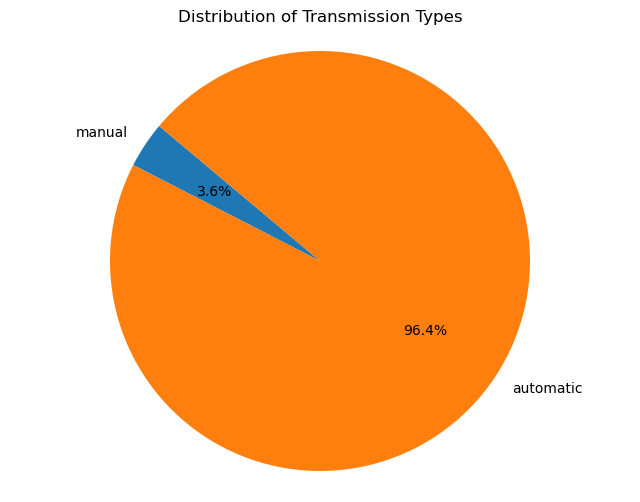

In [8]:
#create pie chart to show he findings 
plt.figure(figsize=(8, 6))
plt.pie(filtered_transmission_df['count'], labels=filtered_transmission_df.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transmission Types')
plt.axis('equal') 
plt.show()

In [59]:
#9 Median selling price based of make of car 
median_selling_price_per_year_make = prices.groupby(['make'])['sellingprice'].median()

print(median_selling_price_by_make)

make
Acura           14900.0
Aston Martin    51000.0
Audi            18500.0
BMW             20100.0
Bentley         62250.0
                 ...   
subaru           3450.0
suzuki           3500.0
toyota           5800.0
volkswagen       3550.0
vw              15500.0
Name: sellingprice, Length: 96, dtype: float64


In [58]:
#Calculate the average median selling price across all car makes 

average_median = median_selling_price_by_make.mean()

print(f"The average of the median selling prices across all car makes is: ${average_median:.2f}")

The average of the median selling prices across all car makes is: $16796.23


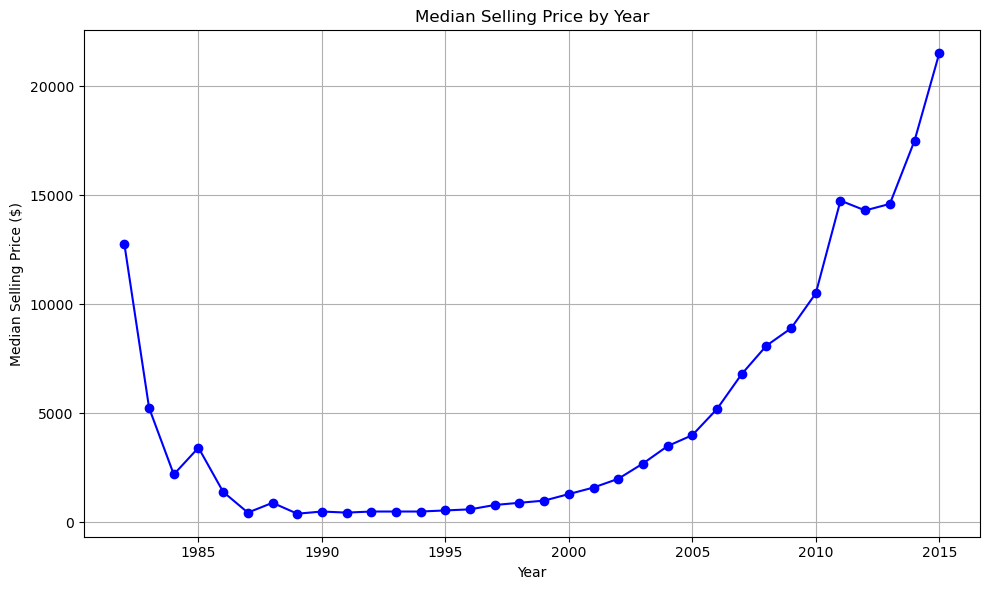

In [60]:
#Create a line graph shpwing the median selling price for each year 

median_selling_price_per_year = prices.groupby('year')['sellingprice'].median()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(median_selling_price_per_year.index, median_selling_price_per_year.values, marker='o', color='b')
plt.title('Median Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Median Selling Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
prices.count()

year            558837
make            548536
model           548438
trim            548186
body            545642
transmission    493485
vin             558833
state           558837
condition       547017
odometer        558743
color           558088
interior        558088
seller          558837
mmr             558799
sellingprice    558825
saledate        558825
dtype: int64

In [82]:
color_distribution_no = prices.dropna(how='any')
color_distribution_no

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [86]:
#Question 5 
color_distribution = prices['color'].value_counts()
color_distribution.head(20)
# Drop all rows with missing information


color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
—             24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: count, dtype: int64

In [77]:
#Question 5 but for interior 
color_distribution = prices['interior'].value_counts()
color_distribution.head(3)

interior
black    244329
gray     178581
beige     59758
Name: count, dtype: int64

In [30]:
color_distribution = pd.merge(car_prices, how="left", on=["color", "value"])
color.ditribution.head()

TypeError: merge() missing 1 required positional argument: 'right'

In [32]:
#Question 8-Calculate the profit/loss by model 
prices['Profit'] = prices['sellingprice']- prices['mmr']
profit_by_make = prices.groupby('make','model')["Profit"].sum()
print(profit_by_make)

ValueError: No axis named model for object type DataFrame

In [92]:
#Question 9
median_price = prices.groupby('make')['sellingprice'].median()
median_price

make
Acura           14900.0
Aston Martin    51000.0
Audi            18500.0
BMW             20100.0
Bentley         62250.0
                 ...   
subaru           3450.0
suzuki           3500.0
toyota           5800.0
volkswagen       3550.0
vw              15500.0
Name: sellingprice, Length: 96, dtype: float64

In [100]:
#Question 11 
dealership_count= prices.groupby(['state' ,'seller']).count()
dealership_count

year  make  model  trim  \
state             seller                                                    
3vwd17aj0fm227318 black                              1     1      1     1   
3vwd17aj2fm258506 gray                               1     1      1     1   
3vwd17aj2fm261566 gray                               1     1      1     1   
3vwd17aj2fm285365 black                              1     1      1     1   
3vwd17aj3fm259017 black                              1     1      1     1   
...                                                ...   ...    ...   ...   
wi                wyss auto sales                    1     1      1     1   
                  zimbrick bmw                       2     2      2     2   
                  zimbrick eastside                 56    55     55    55   
                  zimbrick of middleton             15    15     15    15   
                  zimbrick volkswagen of madison     2     2      2     2   

                                                  body  transmission  vin  \
state             seller                                                    
3vwd17aj0fm227318 black                              1             1    1   
3vwd17aj2fm258506 gray                               1             1    1   
3vwd17aj2fm261566 gray                               1             1    1   
3vwd17aj2fm285365 black                              1             1    1   
3vwd17aj3fm259017 black                              1             1    0   
...                                                ...           ...  ...   
wi                wyss auto sales                    1             1    1   
                  zimbrick bmw                       2             2    2   
                  zimbrick eastside                 55            56   56   
                  zimbrick of middleton             15            15   15   
                  zimbrick volkswagen of madison     2             2    2   

                                                  condition  odometer  color  \
state             seller                                                       
3vwd17aj0fm227318 black                                   0         1      1   
3vwd17aj2fm258506 gray                                    0         1      1   
3vwd17aj2fm261566 gray                                    0         1      1   
3vwd17aj2fm285365 black                                   0         1      1   
3vwd17aj3fm259017 black                                   0         1      1   
...                                                     ...       ...    ...   
wi                wyss auto sales                         1         1      1   
                  zimbrick bmw                            1         2      2   
                  zimbrick eastside                      56        56     56   
                  zimbrick of middleton                  10        15     15   
                  zimbrick volkswagen of madison          2         2      2   

                                                  interior  mmr  sellingprice  \
state             seller                                                        
3vwd17aj0fm227318 black                                  1    0             1   
3vwd17aj2fm258506 gray                                   1    0             1   
3vwd17aj2fm261566 gray                                   1    0             1   
3vwd17aj2fm285365 black                                  1    0             1   
3vwd17aj3fm259017 black                                  1    0             1   
...                                                    ...  ...           ...   
wi                wyss auto sales                        1    1             1   
                  zimbrick bmw                           2    2             2   
                  zimbrick eastside                     56   56            56   
                  zimbrick of middleton                 15   15            15   
                  zimbrick volksw

In [106]:
dealership_count = prices.groupby(['state', 'seller'])
dealership_total = dealership_count.sum()
dealership_total

year  \
state             seller                                   
3vwd17aj0fm227318 black                             2015   
3vwd17aj2fm258506 gray                              2015   
3vwd17aj2fm261566 gray                              2015   
3vwd17aj2fm285365 black                             2015   
3vwd17aj3fm259017 black                             2015   
...                                                  ...   
wi                wyss auto sales                   2011   
                  zimbrick bmw                      4022   
                  zimbrick eastside               112438   
                  zimbrick of middleton            30089   
                  zimbrick volkswagen of madison    4018   

                                                                                               make  \
state             seller                                                                              
3vwd17aj0fm227318 black                                                                  Volkswagen   
3vwd17aj2fm258506 gray                                                                   Volkswagen   
3vwd17aj2fm261566 gray                                                                   Volkswagen   
3vwd17aj2fm285365 black                                                                  Volkswagen   
3vwd17aj3fm259017 black                                                                  Volkswagen   
...                                                                                             ...   
wi                wyss auto sales                                                          Cadillac   
                  zimbrick bmw                                                            BuickFord   
                  zimbrick eastside               NissanChevroletLincolnNissanFordGMCGMCChevrole...   
                  zimbrick of middleton           HondaBuickChryslerBuickHondaAudiFordDodgeMitsu...   
                  zimbrick volkswagen of madison                                     FordVolkswagen   

                                                                                              model  \
state             seller                                                                              
3vwd17aj0fm227318 black                                                                       Jetta   
3vwd17aj2fm258506 gray                                                                        Jetta   
3vwd17aj2fm261566 gray                                                                        Jetta   
3vwd17aj2fm285365 black                                                                       Jetta   
3vwd17aj3fm259017 black                                                                       Jetta   
...                                                                                             ...   
wi                wyss auto sales                                                               SRX   
                  zimbrick bmw                                                          EnclaveEdge   
                  zimbrick eastside               MaximaSuburbanMKSMuranoFusionYukonYukon XLCoba...   
                  zimbrick of middleton           OdysseyPark AvenuePT CruiserLeSabreAccordQ7Exp...   
                  zimbrick volkswagen of madison                                     ExplorerRoutan   

                                                                                               trim  \
state             seller                                                                              
3vwd17aj0fm227318 black                                                      SE PZEV w/Connectivity   
3vwd17aj2fm258506 gray                                                       SE PZEV w/Connectivity   
3vwd17aj2fm261566 gray                                                       SE PZEV w/Connectivity   
3vwd17aj2fm285365 black                                                     

In [56]:
#calculate the lowest selling vehicle models

lowest_sold=prices.groupby("model")["sellingprice"].mean().nsmallest(5)
lowest_sold

model
Paseo             150.00
Windstar Cargo    281.25
300e              300.00
Leganza           300.00
Regency           300.00
Name: sellingprice, dtype: float64